# Lead Scoring Case Study

**Problem: Identifying promising(HOT) leads, i.e. the leads that are most likely to convert into paying customers**

Terminology:
**Leads**: People who land on the Company website and fill Email and Phone Number for enquiry of the Course.
**Hot Leads**:The leads that are most likely to convert into paying customers.

**Objective** : To Build a Regression model which assign a score to each lead such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.


### Step 1: Importing necessary Libraries

In [1034]:
# Importing  required packages
import numpy as np
import pandas as pd
#from datetime import datetime as dt

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### Step 2:Read the DataSet

In [1035]:
#reading Dataset
leads_df = pd.read_csv(r"C:\Users\Aelgani\Desktop\Project\Leads.csv",encoding = "ISO-8859-1")
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [1036]:
xl = pd.ExcelFile(r"C:\Users\Aelgani\Desktop\Project\Leads Data Dictionary.xlsx")

In [1037]:
print(xl.sheet_names)

['Sheet1']


In [1038]:
df1 = xl.parse('Sheet1')

In [1039]:
df1.drop(['Unnamed: 0'],inplace=True,axis=1)

In [1040]:
df1.rename(columns={'Unnamed: 1':'Variables','Unnamed: 2':'Description'},inplace=True)

In [1041]:
df1=df1[1:]

In [1042]:
df1.head()

,Variables,Description
1,Prospect ID,A unique ID with which the customer is identif...
2,Lead Number,A lead number assigned to each lead procured.
3,Lead Origin,The origin identifier with which the customer ...
4,Lead Source,"The source of the lead. Includes Google, Organ..."
5,Do Not Email,An indicator variable selected by the customer...


### Step 3: Inspecting the Leads Dataframe

In [1043]:
leads_df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [1044]:
leads_df.shape

(9240, 37)

**The Data set has 9240 Rows and 37 Columns**

### Step 4: Preparing  the Data

**Step 4_1: Droping Duplicates** 

In [1045]:
#droping Duplicate Rows if any..
leads_df.drop_duplicates(subset='Lead Number')
leads_df.shape

(9240, 37)

**The Dataset has no duplicate rows**

**Step 4_2:Handling NULL Values**

In [1046]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(leads_df.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_df.isnull().sum()/leads_df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead Quality,4767,51.59
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Asymmetrique Activity Index,4218,45.65
Tags,3353,36.29
What matters most to you in choosing a course,2709,29.32
Lead Profile,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63


##### Dropping Reduandent Columns NOT requiredd for Analysis

In [1047]:
# Identifying if any column exists with only null values
leads_df.isnull().all(axis=0).any()

False

**There are no columns with NO Data**

In [1048]:
# Dropping all columns with only 0 values
leads_df.loc[:, (leads_df != 0).any(axis=0)]
leads_df.shape

(9240, 37)

**There are no  Zero filled Columns**

In the Dataset the columns such as  
Magazine
Receive More Updates About Our Courses,
Update me on Supply Chain Content,
Update me on Supply Chain Content,
I agree to pay the amount through cheque,..etc  have only one  Unique values 
<br/>
Therefore they are not useful in classifying lead as Hot or Not.We can drop them

In [1049]:
for col in leads_df.columns:
    if len(leads_df[col].unique()) == 1:
        leads_df.drop(col,inplace=True,axis=1)

In [1050]:
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [1051]:
leads_df.shape

(9240, 32)

In [1052]:
# Droping the columns 'Asymmetrique Activity Score' and 'Asymmetrique Profile Score' 
# as they can be represented by their respective index columns

In [1053]:
leads_df=leads_df.drop(['Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)
leads_df.shape

(9240, 30)

In [1054]:
# Droping the columns 'Prospect ID' as it will not have any impact on the predicting model

In [1055]:
leads_df = leads_df.drop('Prospect ID', axis=1)


In [1056]:
leads_df.shape

(9240, 29)

In [1057]:
#droping the columns 'What matters most to you in choosing a course' as it mostly has unique values and few  null values.
leads_df = leads_df.drop('What matters most to you in choosing a course', axis=1)
leads_df.shape

(9240, 28)

In [1058]:
# Droping the columns 'How did you hear about X Education' as it mostly has null values or 'Select' values 
# that  doesnt contribute to the 'Converted' percentage.
leads_df = leads_df.drop('How did you hear about X Education', axis=1)
leads_df.shape

(9240, 27)

In [1059]:
#Eliminating rows where a particular column has high missing values

In [1060]:
leads_df['Lead Source'].isnull().sum()

36

In [1061]:
# Eliminating rows where a particular column has high missing values as  the column cannot be removed because of its importance
leads_df = leads_df[~pd.isnull(leads_df['Lead Source'])]
leads_df.shape

(9204, 27)

### Step 5 Imputing the Missing Values

**Imputing the continuous variables with Median values**

In [1062]:
  
leads_df['TotalVisits'].replace(np.NaN, leads_df['TotalVisits'].median(), inplace =True)

In [1063]:
leads_df['Page Views Per Visit'].replace(np.NaN, leads_df['Page Views Per Visit'].median(), inplace =True)

**Imputing the Categorical variables with Mode values**

In [1064]:
leads_df['Country'].mode()

0    India
dtype: object

In [1065]:
leads_df.loc[pd.isnull(leads_df['Country']), ['Country']] = 'India'

In [1066]:
leads_df['Country'] = leads_df['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
leads_df['Country'].value_counts()

India            8917
Outside India     287
Name: Country, dtype: int64

In [1067]:
#lets see how many HOT leads are successfulyy converted within INdia

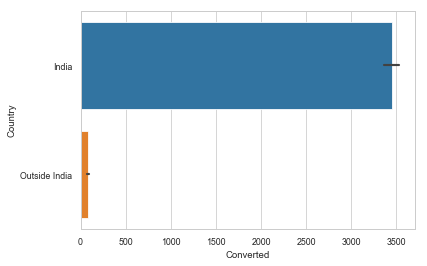

In [1068]:
sns.barplot(y='Country', x='Converted', data=leads_df, estimator=np.sum)

**Handling SELECT values in Columns**

**Assigning a Unique Category 'NOTKNOWN'  to NULL/SELECT values**

In [1069]:
leads_df['Lead Quality'].value_counts()

Might be             1545
Not Sure             1090
High in Relevance     632
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [1070]:
leads_df['Lead Quality'].isnull().sum()

4753

In [1071]:
leads_df['Lead Quality'].fillna("NOT known", inplace = True)
leads_df['Lead Quality'].value_counts()

NOT known            4753
Might be             1545
Not Sure             1090
High in Relevance     632
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

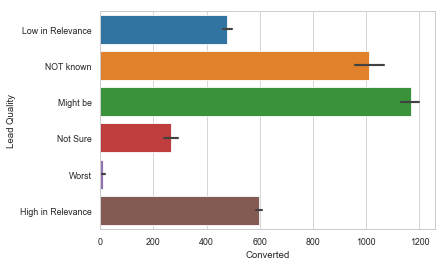

In [1072]:
sns.barplot(y='Lead Quality', x='Converted',  data=leads_df, estimator=np.sum)

***Adding a new categorcal variable consisting on NULL/Select values for the field `Asymmetrique Profile Index`***

In [1073]:
leads_df['Asymmetrique Profile Index'].value_counts()

02.Medium    2771
01.High      2201
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [1074]:
leads_df['Asymmetrique Profile Index'].isnull().sum()

4201

In [1075]:
leads_df['Asymmetrique Profile Index'].fillna("Notknown", inplace = True)
leads_df['Asymmetrique Profile Index'].value_counts()

Notknown     4201
02.Medium    2771
01.High      2201
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

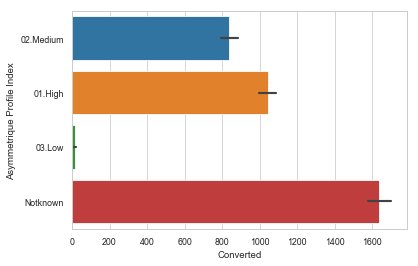

In [1076]:
sns.barplot(y='Asymmetrique Profile Index', x='Converted',  data=leads_df, estimator=np.sum)

***Adding a new category consisting on NULL/Select values for the field `Asymmetrique Activity Index`***

In [1077]:
leads_df['Asymmetrique Activity Index'].value_counts()

02.Medium    3820
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [1078]:
leads_df['Asymmetrique Activity Index'].isnull().sum()

4201

In [1079]:
leads_df['Asymmetrique Activity Index'].fillna("Notknown", inplace = True)
leads_df['Asymmetrique Activity Index'].value_counts()

Notknown     4201
02.Medium    3820
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

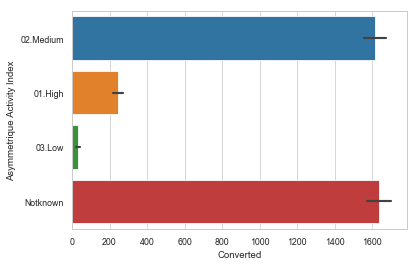

In [1080]:
sns.barplot(y='Asymmetrique Activity Index', x='Converted', data=leads_df, estimator=np.sum)

***Creating a new category consisting on NULL/Select values for the field  CITY***

In [1081]:
leads_df['City'].isnull().sum()

1420

In [1082]:
leads_df['City'].fillna("NOTKNOWN", inplace = True)
leads_df['City'].value_counts()

Mumbai                         3220
Select                         2218
NOTKNOWN                       1420
Thane & Outskirts               751
Other Cities                    686
Other Cities of Maharashtra     456
Other Metro Cities              379
Tier II Cities                   74
Name: City, dtype: int64

In [1083]:
leads_df['City'].replace('Select', 'NOTKNOWN', inplace =True)
leads_df['City'].value_counts()

NOTKNOWN                       3638
Mumbai                         3220
Thane & Outskirts               751
Other Cities                    686
Other Cities of Maharashtra     456
Other Metro Cities              379
Tier II Cities                   74
Name: City, dtype: int64

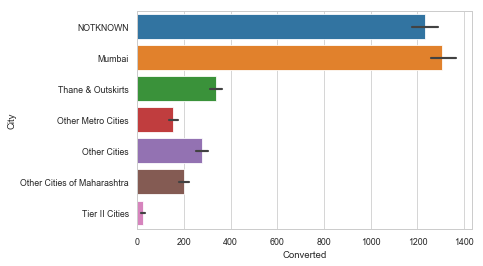

In [1084]:
sns.barplot(y='City', x='Converted',  data=leads_df, estimator=np.sum)

***Adding a new category consisting on NULL/Select values for the field `Last Activity`***

In [1085]:
leads_df['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2723
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [1086]:
leads_df['Last Activity'].isnull().sum()

101

In [1087]:
leads_df['Last Activity'].fillna("NOTKNOWN", inplace = True)
leads_df['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2723
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
NOTKNOWN                         101
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

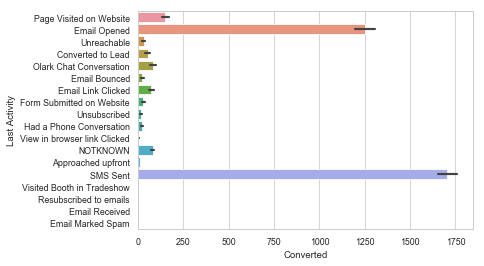

In [1088]:
sns.barplot(y='Last Activity', x='Converted', data=leads_df, estimator=np.sum)

***Addin a new category consisting on NULL/Select values for the field LEAD PROFILE***

In [1089]:
leads_df['Lead Profile'].value_counts()

Select                         4115
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [1090]:
leads_df['Lead Profile'].isnull().sum()

2709

In [1091]:
leads_df['Lead Profile'].fillna("NOTKNOWN", inplace = True)
leads_df['Lead Profile'].value_counts()

Select                         4115
NOTKNOWN                       2709
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [1092]:
leads_df['Lead Profile'].replace('Select', 'NOTKNOWN', inplace =True)
leads_df['Lead Profile'].value_counts()

NOTKNOWN                       6824
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

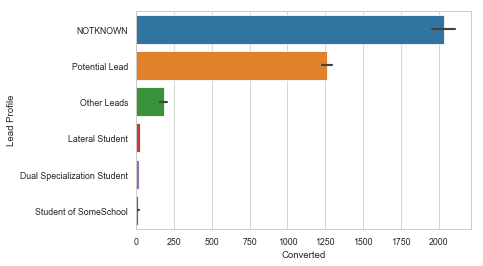

In [1093]:
sns.barplot(y='Lead Profile', x='Converted', data=leads_df, estimator=np.sum)

***Adding a new category consisting on NULL/Select values for the field  'What is your current occupation ' ***

In [1094]:
leads_df['What is your current occupation'].value_counts()

Unemployed              5567
Working Professional     704
Student                  209
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [1095]:
leads_df['What is your current occupation'].isnull().sum()

2690

In [1096]:
leads_df['What is your current occupation'].fillna("NOTKNOWN", inplace = True)
leads_df['What is your current occupation'].value_counts()

Unemployed              5567
NOTKNOWN                2690
Working Professional     704
Student                  209
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

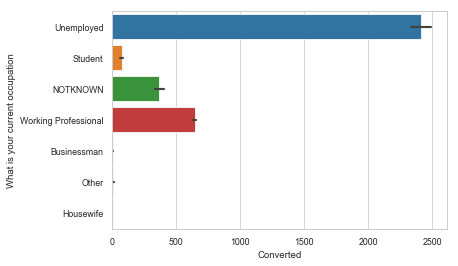

In [1097]:
sns.barplot(y='What is your current occupation', x='Converted', data=leads_df, estimator=np.sum)

***Creating a new category consisting on NULL/Select values for the field  Specialization ***

In [1098]:
leads_df['Specialization'].value_counts()

Select                               1914
Finance Management                    973
Human Resource Management             847
Marketing Management                  837
Operations Management                 502
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 158
Hospitality Management                114
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [1099]:
leads_df['Specialization'].isnull().sum()

1438

In [1100]:
leads_df['Specialization'].fillna("NOTKNOWN", inplace = True)
leads_df['Specialization'].value_counts()

Select                               1914
NOTKNOWN                             1438
Finance Management                    973
Human Resource Management             847
Marketing Management                  837
Operations Management                 502
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 158
Hospitality Management                114
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

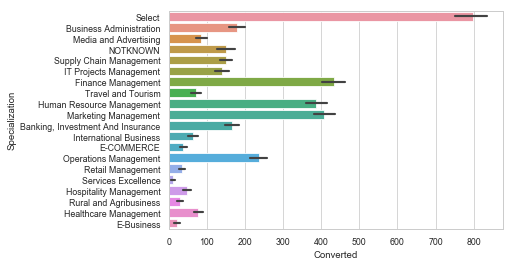

In [1101]:
sns.barplot(y='Specialization', x='Converted', data=leads_df, estimator=np.sum)

***Adding a new category consisting on NULL/Select values for the field Tags ***

In [1102]:
leads_df['Tags'].value_counts()

Will revert after reading the email                  2052
Ringing                                              1200
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          174
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with EINS                                     12
Lost to Others

In [1103]:
leads_df['Tags'].isnull().sum()

3342

In [1104]:
leads_df['Tags'].fillna("NOTKNOWN", inplace = True)
leads_df['Tags'].value_counts()

NOTKNOWN                                             3342
Will revert after reading the email                  2052
Ringing                                              1200
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          174
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with 

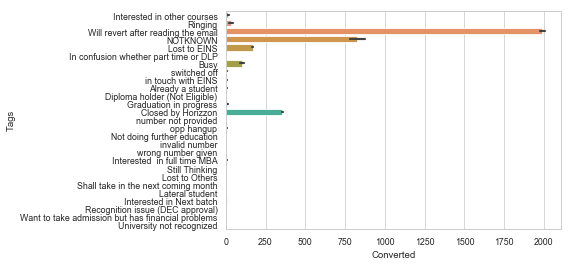

In [1105]:
sns.barplot(y='Tags', x='Converted', data=leads_df, estimator=np.sum)

**After NULL Value treatment let's Re-inspect Null Values in the data set**

In [1106]:
# total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(leads_df.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_df.isnull().sum()/leads_df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1).head(27)

,Total,Percentage
Last Notable Activity,0,0.00
What is your current occupation,0,0.00
Lead Origin,0,0.00
Lead Source,0,0.00
Do Not Email,0,0.00
Do Not Call,0,0.00
Converted,0,0.00
TotalVisits,0,0.00
Total Time Spent on Website,0,0.00
Page Views Per Visit,0,0.00


**ALL NULL Values are treated  and NO column contains NULL values**

##  Outliers Analyisis

In [1107]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
leads_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9204.00,9204.00,9204.00,9204.00,9204.00
mean,617194.61,0.38,3.45,489.01,2.36
std,23418.83,0.49,4.82,547.98,2.15
min,579533.00,0.00,0.00,0.00,0.00
25%,596484.50,0.00,1.00,14.00,1.00
50%,615479.00,0.00,3.00,250.00,2.00
75%,637409.25,1.00,5.00,938.00,3.00
90%,650513.10,1.00,7.00,1380.00,5.00
95%,655405.85,1.00,10.00,1562.00,6.00
99%,659599.46,1.00,17.00,1839.97,9.00


In [1108]:
leads_df.dtypes

Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Do Not Call                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Country                                    object
Specialization                             object
What is your current occupation            object
Search                                     object
Newspaper Article                          object
X Education Forums                         object
Newspaper                                  object
Digital Advertisement                      object
Through Recommendations                    object
Tags                                       object


In [1109]:
numeric_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
print(numeric_var)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


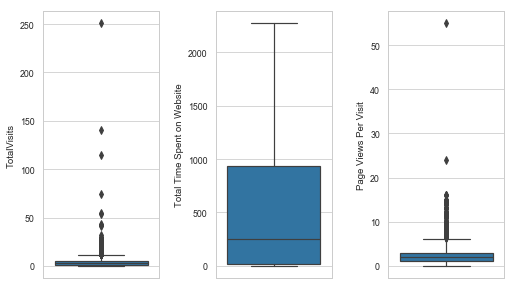

In [1110]:
numeric_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(12,8))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var, data=leads_df)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_var)

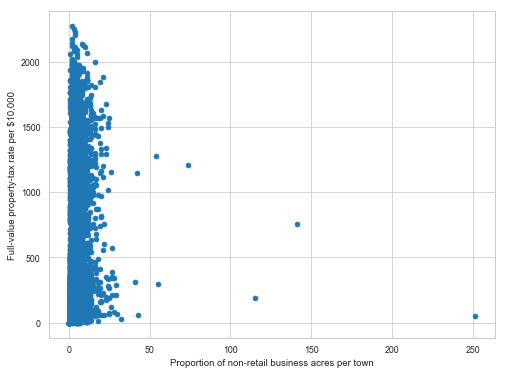

In [1111]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(leads_df['TotalVisits'], leads_df['Total Time Spent on Website'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

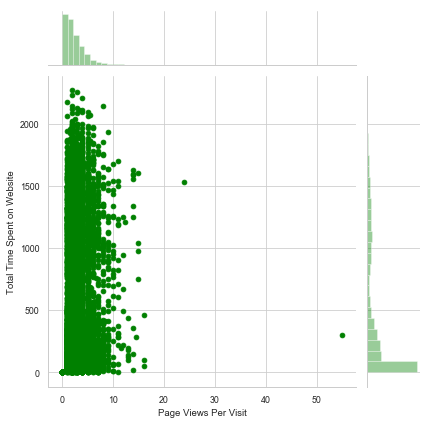

In [1112]:
sns.jointplot(leads_df['Page Views Per Visit'],leads_df['Total Time Spent on Website'], color="g")
plt.show()

### Removing outlier values based on the Interquartile range for some of the continuous variable

In [1113]:
Q1 = leads_df['TotalVisits'].quantile(0.25)
Q3 = leads_df['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
leads_df=leads_df.loc[(leads_df['TotalVisits'] >= Q1 - 1.5*IQR) & (leads_df['TotalVisits'] <= Q3 + 1.4*IQR)]

Q1 = leads_df['Page Views Per Visit'].quantile(0.25)
Q3 = leads_df['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads_df=leads_df.loc[(leads_df['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads_df['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

leads_df.shape

(8575, 27)

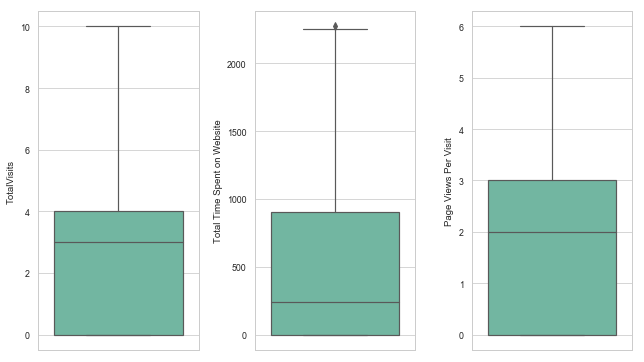

In [1114]:
#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(15,10))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='Set2', data=leads_df)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_var)

In [1115]:
leads_df.shape

(8575, 27)

### Converting binary variables (Yes/No) to 0/1

In [1116]:
# List of variables to map

varlist =  ['Search','Do Not Email', 'Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_df[varlist] = leads_df[varlist].apply(binary_map)
leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.00,0,0.00,Page Visited on Website,...,0,0,Interested in other courses,Low in Relevance,NOTKNOWN,NOTKNOWN,02.Medium,02.Medium,0,Modified
1,660728,API,Organic Search,0,0,0,5.00,674,2.50,Email Opened,...,0,0,Ringing,NOT known,NOTKNOWN,NOTKNOWN,02.Medium,02.Medium,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.00,1532,2.00,Email Opened,...,0,0,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.00,305,1.00,Unreachable,...,0,0,Ringing,Not Sure,NOTKNOWN,Mumbai,02.Medium,01.High,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.00,1428,1.00,Converted to Lead,...,0,0,Will revert after reading the email,Might be,NOTKNOWN,Mumbai,02.Medium,01.High,0,Modified


### Creating dummy features (one-hot encoded) for categorical variables with multiple levels

In [1117]:
dummy1 = pd.get_dummies(leads_df[['Country', 'Lead Source','Lead Origin','Last Notable Activity']], drop_first=True)
leads_df = pd.concat([leads_df, dummy1], axis=1)
leads_df.shape

(8575, 66)

In [1118]:
ml = pd.get_dummies(leads_df['Lead Quality'], prefix='Lead Quality')
ml1 = ml.drop(['Lead Quality_NOT known'], 1)
leads_df = pd.concat([leads_df,ml1], axis=1)

In [1119]:
ml = pd.get_dummies(leads_df['Asymmetrique Profile Index'], prefix='Asymmetrique Profile Index')
ml1 = ml.drop(['Asymmetrique Profile Index_Notknown'], 1)
leads_df = pd.concat([leads_df,ml1], axis=1)


In [1120]:
ml = pd.get_dummies(leads_df['Asymmetrique Activity Index'], prefix='Asymmetrique Activity Index')
ml1 = ml.drop(['Asymmetrique Activity Index_Notknown'], 1)
leads_df = pd.concat([leads_df,ml1], axis=1)

In [1121]:
ml = pd.get_dummies(leads_df['Tags'], prefix='Tags')
ml1 = ml.drop(['Tags_NOTKNOWN'], 1)
leads_df = pd.concat([leads_df,ml1], axis=1)

In [1122]:
ml = pd.get_dummies(leads_df['Lead Profile'], prefix='Lead Profile')
ml1 = ml.drop(['Lead Profile_NOTKNOWN'], 1)
leads_df = pd.concat([leads_df,ml1], axis=1)


In [1123]:
ml = pd.get_dummies(leads_df['What is your current occupation'], prefix='What is your current occupation')
ml1 = ml.drop(['What is your current occupation_NOTKNOWN'], 1)
leads_df = pd.concat([leads_df,ml1], axis=1)


In [1124]:

ml = pd.get_dummies(leads_df['Specialization'], prefix='Specialization')
ml1 = ml.drop(['Specialization_NOTKNOWN'], 1)
leads_df = pd.concat([leads_df,ml1], axis=1)

In [1125]:

ml = pd.get_dummies(leads_df['City'], prefix='City')
ml1 = ml.drop(['City_NOTKNOWN'], 1)
leads_df = pd.concat([leads_df,ml1], axis=1)

In [1126]:

ml = pd.get_dummies(leads_df['Last Activity'], prefix='Last Activity')
ml1 = ml.drop(['Last Activity_NOTKNOWN'], 1)
leads_df = pd.concat([leads_df,ml1], axis=1)


In [1127]:
leads_df.shape

(8575, 156)

In [1128]:
leads_df = leads_df.drop(['Lead Quality','Asymmetrique Profile Index','Asymmetrique Activity Index','Tags','Lead Profile',
                    'Lead Origin','What is your current occupation', 'Specialization', 'City','Last Activity', 'Country', 
                    'Lead Source','Last Notable Activity'], 1)


In [1129]:
leads_df.shape

(8575, 143)

In [1130]:
leads_df.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,660737,0,0,0,0.00,0,0.00,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,0,0,5.00,674,2.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.00,1532,2.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.00,305,1.00,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,660681,0,0,1,2.00,1428,1.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1131]:
# Ensuring there are no categorical columns left in the dataframe
cols = leads_df.columns
num_cols = leads_df._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

In [1132]:
# Creating a copy of this origial variable in case if needed later on
original_leads_df = leads_df.copy()
print(original_leads_df.shape)
print(leads_df.shape)

(8575, 143)
(8575, 143)


## Step 5: Splitting the Data set into Train and Test Set

In [1133]:
from sklearn.model_selection import train_test_split

In [1134]:
# Taking feature variable to X
X = leads_df.drop(['Converted','Lead Number'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0,0,0.00,0,0.00,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.00,674,2.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.00,1532,2.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.00,305,1.00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,2.00,1428,1.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1135]:
# Putting target variable to y
y = leads_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1136]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 6:  Scaling the Features

In [1137]:
from sklearn.preprocessing import StandardScaler

In [1138]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
8529,0,0,0.97,-0.86,1.79,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7331,0,0,0.10,-0.22,0.56,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7688,0,0,0.10,1.52,0.56,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
92,0,0,0.54,-0.69,1.17,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4908,0,0,-1.20,-0.87,-1.27,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1139]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
count,6002.00,6002.00,6002.00,6002.00,6002.00,6002.00,6002.00,6002.00,6002.00,6002.00,...,6002.00,6002.00,6002.00,6002.00,6002.00,6002.00,6002.00,6002.00,6002.00,6002.00
mean,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.00,0.11,0.06,0.00,0.30,0.01,0.01,0.00,0.00
std,0.27,0.00,1.00,1.00,1.00,0.03,0.00,0.00,0.01,0.02,...,0.12,0.05,0.31,0.24,0.00,0.46,0.10,0.09,0.02,0.01
min,0.00,0.00,-1.20,-0.87,-1.27,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,-0.77,-0.87,-0.66,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.10,-0.44,-0.05,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.54,0.78,0.56,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
max,1.00,0.00,3.14,3.30,2.40,1.00,0.00,0.00,1.00,1.00,...,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00


### Verifying the Lead Conversion Rate

In [1140]:
### Checking the Lead Conversion Rate
converted = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
converted

38.04081632653061

**Conclusion:We have 38% lead conversion rate**

### Step 7:  Building the model

In [1141]:
import statsmodels.api as sm

In [1142]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5871
Model Family:                Binomial   Df Model:                          130
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 26 Aug 2019   Deviance:                          nan
Time:                        21:46:37   Pearson chi2:                 2.91e+18
No. Iterations:                   100   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                  -3.921e+15   1.08e+08  -3.62e+07      0.000   -3.92e+15   -3.92e+15
Do Not Email                                           -4.498e+14   4.66e+06  -9.65e+07      0.000    -4.5e+14    -4.5e+14
Do Not Call                                               -0.1931   1.87e-06  -1.03e+05      0.000      -0.193      -0.193
TotalVisits                                             4.758e+13   1.51e+06   3.15e+07      0.000    4.76e+13    4.76e+13
Total Time Spent on Website                             3.464e+14   1.07e+06   3.24e+08      0.000    3.46e+14    3.46e+14
Page Views Per Visit                                   -9.053e+13   1.64e+06  -5.53e+07      0.000   -9.05e+13   -9.05e+13
Search                                                   1.26e+15    2.9e+07   4.34e+07      0.000    1.26e+15    1.26e+15
Newspaper Article                                         -0.0211   1.48e-06  -1.42e+04      0.000      -0.021      -0.021
X Education Forums                                       -54.3920    1.9e-06  -2.86e+07      0.000     -54.392     -54.392
Newspaper                                               -3.43e+15   6.76e+07  -5.07e+07      0.000   -3.43e+15   -3.43e+15
Digital Advertisement                                   -3.72e+14   4.85e+07  -7.66e+06      0.000   -3.72e+14   -3.72e+14
Through Recommendations                                -4.086e+14      5e+07  -8.17e+06      0.000   -4.09e+14   -4.09e+14
A free copy of Mastering The Interview                 -3.183e+13   2.94e+06  -1.08e+07      0.000   -3.18e+13   -3.18e+13
Country_Outside India                                   7.502e+13   4.99e+06    1.5e+07      0.000     7.5e+13     7.5e+13
Lead Source_Direct Traffic                              3.049e+15   7.95e+07   3.83e+07      0.000    3.05e+15    3.05e+15
Lead Source_Facebook                                     1.54e+15   4.01e+07   3.84e+07      0.000    1.54e+15    1.54e+15
Lead Source_Google                                      3.111e+15   7.95e+07   3.91e+07      0.000    3.11e+15    3.11e+15
Lead Source_Live Chat                                   3.088e+15   6.31e+07   4.89e+07      0.000    3.09e+15    3.09e+15
Lead Source_NC_EDM                                      7.586e+15   1.04e+08   7.28e+07      0.000    7.59e+15    7.59e+15
Lead Source_Olark Chat                                  2.957e+15   7.94e+07   3.73e+07      0.000    2.96e+15    2.96e+15
Lead Source_Organic Search                               3.05e+15   7.96e+07   3.83e+07      0.000    3.05e+15    3.05e+15
Lead Source_Pay per Click Ads                           4.962e+14   1.04e+08   4.76e+06      0.000    4.96e+14    4.96e+14
Lead Source_Press_Release                                -26.2603   8.39e-07  -3.13e+07

### Step 8: Selecting the features using RFE

In [1143]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1144]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [1145]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True, False, False, False, False, False,  True, False,
        True, False,  True, False,  True, False, False, False, False,
        True, False,  True,  True, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [1146]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 12),
 ('Do Not Call', False, 127),
 ('TotalVisits', False, 73),
 ('Total Time Spent on Website', False, 19),
 ('Page Views Per Visit', False, 70),
 ('Search', False, 31),
 ('Newspaper Article', False, 121),
 ('X Education Forums', False, 120),
 ('Newspaper', False, 98),
 ('Digital Advertisement', False, 96),
 ('Through Recommendations', False, 108),
 ('A free copy of Mastering The Interview', False, 97),
 ('Country_Outside India', False, 88),
 ('Lead Source_Direct Traffic', False, 25),
 ('Lead Source_Facebook', False, 46),
 ('Lead Source_Google', False, 28),
 ('Lead Source_Live Chat', False, 115),
 ('Lead Source_NC_EDM', False, 39),
 ('Lead Source_Olark Chat', False, 89),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Pay per Click Ads', False, 116),
 ('Lead Source_Press_Release', False, 124),
 ('Lead Source_Reference', False, 23),
 ('Lead Source_Referral Sites', False, 27),
 ('Lead Source_Social Media', False, 119),
 ('Lead Source_WeLearn', False, 

In [1147]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Last Activity_SMS Sent'],
      dtype='object')

In [1148]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement',
       ...
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow'],
      dtype='object', length=126)

**Analyzing the model with StatsModels**

In [1149]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5986
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1434.0
Date:                Mon, 26 Aug 2019   Deviance:                       2868.1
Time:                        21:46:44   Pearson chi2:                 7.88e+03
No. Iterations:                    23   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9159      0.070    -27.351      0.000      -2.053      -1.779
Lead Source_Welingak Website                 4.6724      0.728      6.417      0.000       3.245       6.099
Lead Quality_Worst                          -2.4108      0.717     -3.364      0.001      -3.815      -1.006
Asymmetrique Activity Index_03.Low          -1.9529      0.379     -5.151      0.000      -2.696      -1.210
Tags_Already a student                      -2.4803      0.725     -3.422      0.001      -3.901      -1.060
Tags_Closed by Horizzon                      6.4898      0.714      9.088      0.000       5.090       7.889
Tags_Interested in other courses            -1.6373      0.321     -5.107      0.000      -2.266      -1.009
Tags_Lost to EINS                            6.5116      0.825      7.897      0.000       4.896       8.128
Tags_Not doing further education            -2.3638      1.031     -2.293      0.022      -4.384      -0.344
Tags_Ringing                                -2.8608      0.234    -12.223      0.000      -3.320      -2.402
Tags_Will revert after reading the email     4.7678      0.174     27.439      0.000       4.427       5.108
Tags_invalid number                        -23.2957   1.63e+04     -0.001      0.999    -3.2e+04    3.19e+04
Tags_number not provided                   -23.5788   2.73e+04     -0.001      0.999   -5.35e+04    5.34e+04
Tags_switched off                           -3.7641      0.719     -5.234      0.000      -5.174      -2.354
Tags_wrong number given                    -23.7094    2.1e+04     -0.001      0.999   -4.13e+04    4.12e+04
Last Activity_SMS Sent                       2.1410      0.102     20.891      0.000       1.940       2.342
============================================================================================================
"""

In [1150]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8529   0.07
7331   0.01
7688   0.56
92     0.13
4908   0.13
451    0.01
4945   0.01
2844   0.99
4355   0.13
7251   0.00
dtype: float64

In [1151]:
# reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06687694, 0.00835322, 0.5560449 , 0.12831818, 0.12831818,
       0.00835322, 0.00835322, 0.99325983, 0.12831818, 0.00110475])

#### Creating a dataframe with the LeadID and the predicted probabilities

In [1152]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.07,8529
1,0,0.01,7331
2,1,0.56,7688
3,0,0.13,92
4,0,0.13,4908


**Creating new column 'predicted' with 1 if Converion_Prob > 0.5 else 0**

In [1153]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.07,8529,0
1,0,0.01,7331,0
2,1,0.56,7688,1
3,0,0.13,92,0
4,0,0.13,4908,0


#### Creating Confusion Metrics

In [1154]:
from sklearn import metrics

In [1155]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3433  303]
 [ 255 2011]]


**Accuracy of the Model**

In [1156]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.90703098967011


**Checking Variation Inflation Factors**

In [1157]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1158]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_Not doing further education,1.14
0,Lead Source_Welingak Website,1.03
2,Asymmetrique Activity Index_03.Low,1.02
12,Tags_switched off,1.02
4,Tags_Closed by Horizzon,1.01
6,Tags_Lost to EINS,1.01
10,Tags_invalid number,1.01
11,Tags_number not provided,1.01
13,Tags_wrong number given,1.00
1,Lead Quality_Worst,0.66


**Since VIF <5 Clearly  it shows that there is not much multicollinearity present in our model among the selected features** 

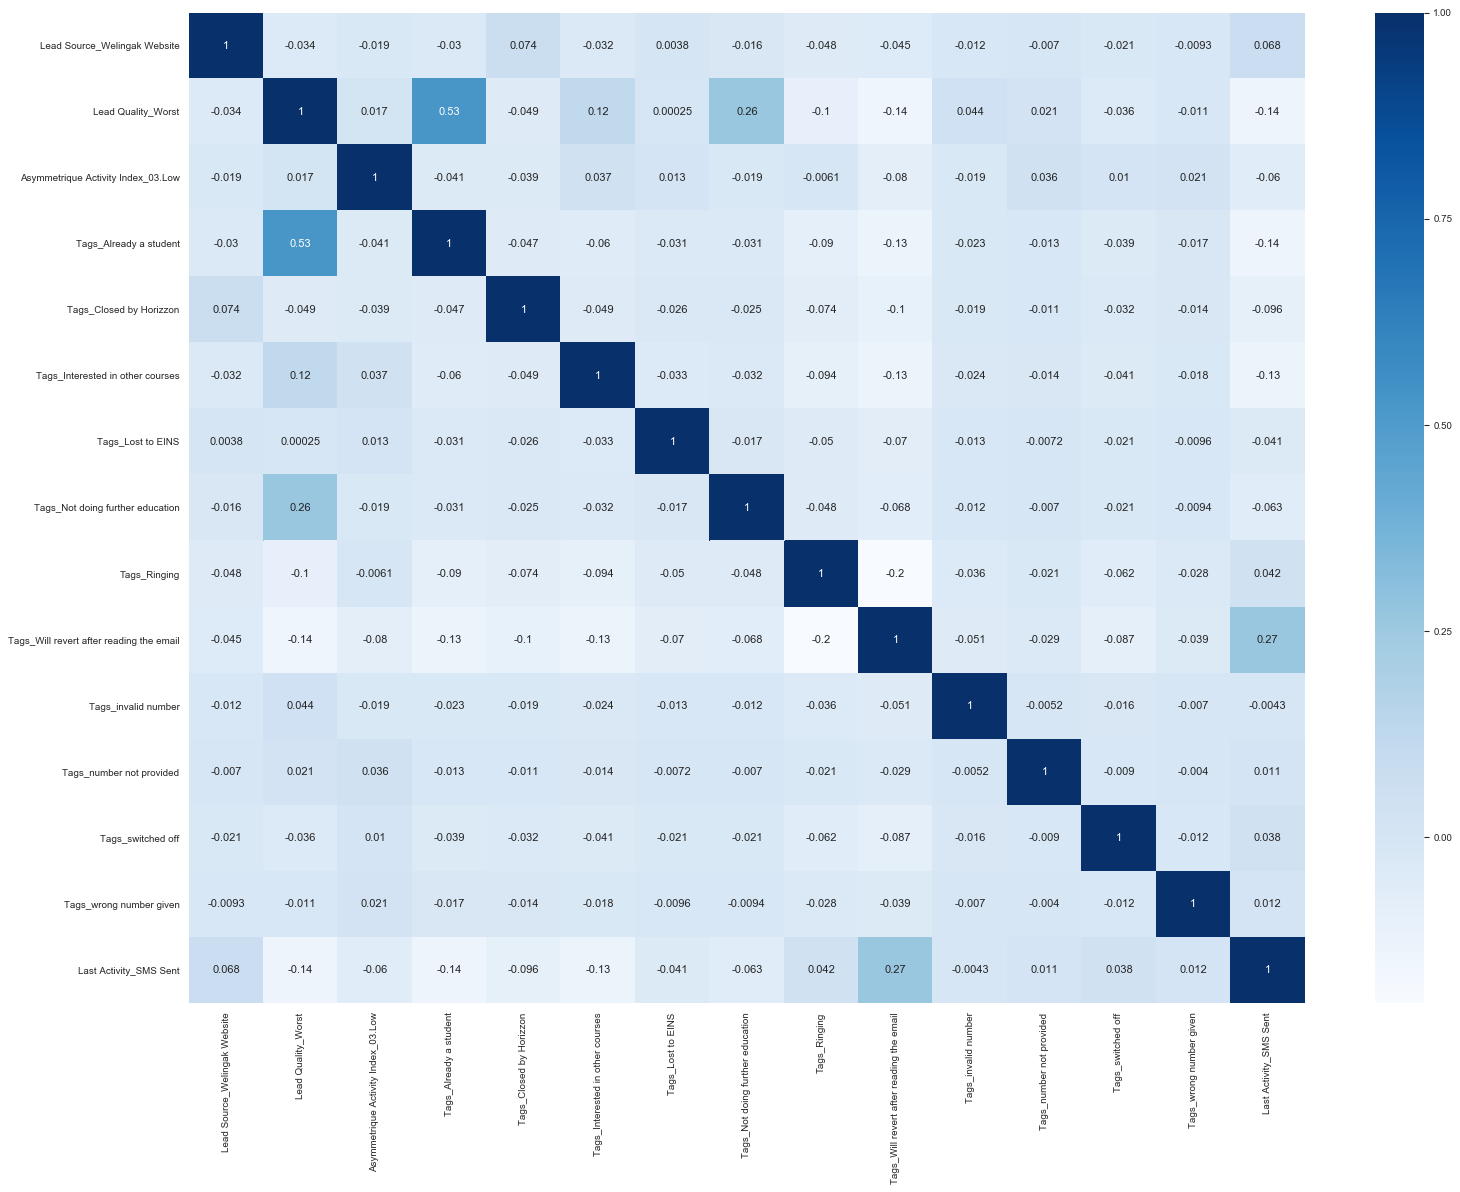

In [1159]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="Blues")

plt.tight_layout()
plt.show()

Our new model have the following charcteristics:
1. All variables have p-value < 0.05.
2. All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. 
3. The overall accuracy of 0.90 at a probability threshold of 0.05 is also very acceptable.

## Step 8: Calculating other Metrics

In [1160]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1161]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8874669020300088

In [1162]:
# Let us calculate specificity
TN / float(TN+FP)

0.9188972162740899

In [1163]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08110278372591007


In [1164]:
# positive predictive value 
print (TP / float(TP+FP))

0.8690579083837511


In [1165]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9308568329718004


## Step 8: Plotting the ROC Curve

In [1166]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [1167]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

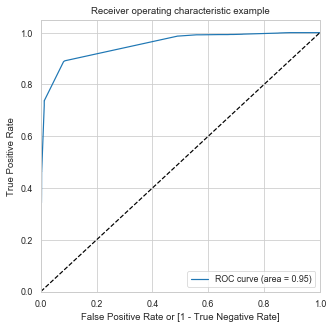

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.67665953e-04, 1.60599572e-03, 1.87366167e-03, 2.14132762e-03,
        2.40899358e-03, 2.67665953e-03, 2.67665953e-03, 2.67665953e-03,
        2.67665953e-03, 2.94432548e-03, 1.20449679e-02, 1.20449679e-02,
        1.20449679e-02, 1.20449679e-02, 1.23126338e-02, 1.25802998e-02,
        1.25802998e-02, 8.11027837e-02, 8.45824411e-02, 8.85974304e-02,
        4.90631692e-01, 4.91702355e-01, 4.92237687e-01, 4.93040685e-01,
        5.58083512e-01, 5.74143469e-01, 6.38918630e-01, 6.39453961e-01,
        6.69967880e-01, 6.70503212e-01, 6.79603854e-01, 6.90310493e-01,
        7.21359743e-01, 7.22162741e-01, 7.24036403e-01, 7.25910064e-01,
        8.48768737e-01, 8.49304069e-01, 8.54657388e-01, 8.77141328e-01,
        8.77408994e-01, 8.77676660e-01, 8.94004283e-01, 8.94271949e-01,
        8.97751606e-01, 9.12205567e-01, 9.17291221e-01, 9.689507

In [1168]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Calculating the area under the curve

In [1169]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [1170]:
auc = auc_val(fpr,tpr)
auc

0.9533957666727776

#### Step 9: Finding Optimal Cutoff Point

In [1171]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.07,8529,0,1,0,0,0,0,0,0,0,0,0
1,0,0.01,7331,0,1,0,0,0,0,0,0,0,0,0
2,1,0.56,7688,1,1,1,1,1,1,1,0,0,0,0
3,0,0.13,92,0,1,1,0,0,0,0,0,0,0,0
4,0,0.13,4908,0,1,1,0,0,0,0,0,0,0,0


In [1172]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.38   1.00   0.00
0.10  0.10      0.69   0.99   0.51
0.20  0.20      0.91   0.89   0.92
0.30  0.30      0.91   0.89   0.92
0.40  0.40      0.91   0.89   0.92
0.50  0.50      0.91   0.89   0.92
0.60  0.60      0.89   0.74   0.99
0.70  0.70      0.89   0.74   0.99
0.80  0.80      0.89   0.73   0.99
0.90  0.90      0.89   0.73   0.99


###  plotting accuracy sensitivity and specificity for various probabilities

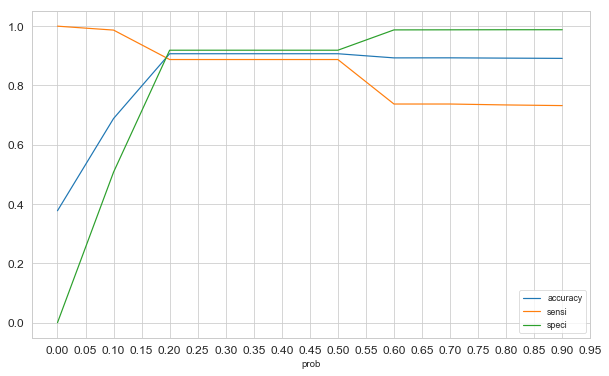

In [1173]:
# Slightly alter the figure size to make it more horizontal.

#plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

In [1174]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.19 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.07,8529,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.01,7331,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.56,7688,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.13,92,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.13,4908,0,1,1,0,0,0,0,0,0,0,0,0


In [1175]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9060313228923692

In [1176]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion

array([[3433,  303],
       [ 255, 2011]], dtype=int64)

In [1177]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [1178]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8905560458958517

In [1179]:
# Let us calculate specificity
TN / float(TN+FP)

0.9154175588865097

In [1180]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08458244111349036


In [1181]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8646101113967438


In [1182]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9323882224645583


### Step 9: Calculating Precision and Recall

In [1183]:
precision = confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])
precision

0.8646101113967438

In [1184]:
recall = confusion1[1,1]/(confusion1[1,0]+confusion1[1,1])
recall

0.8905560458958517

In [1185]:
from sklearn.metrics import precision_score, recall_score

In [1186]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8646101113967438

In [1187]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8905560458958517

In [1188]:
from sklearn.metrics import precision_recall_curve

In [1189]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       1
 3       0
 4       0
 5       0
 6       0
 7       1
 8       0
 9       0
 10      1
 11      0
 12      0
 13      1
 14      0
 15      0
 16      0
 17      0
 18      1
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      0
 27      1
 28      0
 29      0
        ..
 5972    0
 5973    0
 5974    1
 5975    1
 5976    0
 5977    0
 5978    1
 5979    1
 5980    0
 5981    0
 5982    1
 5983    0
 5984    0
 5985    0
 5986    1
 5987    0
 5988    1
 5989    1
 5990    0
 5991    1
 5992    0
 5993    0
 5994    0
 5995    0
 5996    1
 5997    0
 5998    0
 5999    0
 6000    1
 6001    0
 Name: Converted, Length: 6002, dtype: int64, 0       0
 1       0
 2       1
 3       0
 4       0
 5       0
 6       0
 7       1
 8       0
 9       0
 10      0
 11      0
 12      0
 13      1
 14      0
 15      0
 16      0
 17      0
 18      1
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      

In [1190]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

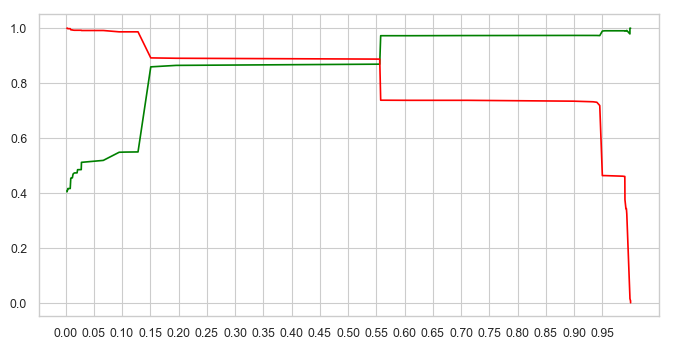

In [1191]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

#### From the precision-recall graph above, we get the optical threshold value as close to .57. However our business requirement here is to have Lead Conversion Rate around 80%. so we stick to the orginal threshold  


### Calculating the F1 score

In [1192]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.8773913043478261

### Step 10: Making predictions on the test set

In [1193]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
6190,0,0,-1.20,-0.87,-1.27,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7073,0,0,0.97,-0.62,1.79,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4519,1,0,-1.20,-0.87,-1.27,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
607,0,0,-1.20,-0.87,-1.27,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
440,0,0,1.40,-0.09,0.56,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1194]:
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Lead Quality_Worst,Asymmetrique Activity Index_03.Low,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_switched off,Tags_wrong number given,Last Activity_SMS Sent
6190,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
7073,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4519,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
607,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
440,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Adding the constant to avoid overfitting

In [1195]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set

In [1196]:
y_test_pred = res.predict(X_test_sm)

In [1197]:
y_test_pred[:10]

6190   0.00
7073   0.13
4519   0.13
607    1.00
440    0.13
4247   0.13
7431   0.02
726    0.56
7300   0.02
4046   0.13
dtype: float64

In [1198]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1199]:
y_pred_1.head()

,0
6190,0.00
7073,0.13
4519,0.13
607,1.00
440,0.13


In [1200]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1201]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [1202]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1203]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1204]:
y_pred_final.head()

,Converted,LeadID,0
0,0,6190,0.00
1,0,7073,0.13
2,0,4519,0.13
3,1,607,1.00
4,0,440,0.13


In [1205]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [1206]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadID','Converted','Conversion_Prob'], axis=1)

In [1207]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,6190,0,0.00
1,7073,0,0.13
2,4519,0,0.13
3,607,1,1.00
4,440,0,0.13


In [1208]:
y_pred_final.shape

(2573, 3)

#### Using the probability threshold value 0f 0.19 on the test dataset to predict if a lead will convert

In [1209]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.19 else 0)

In [1210]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,6190,0,0.00,0
1,7073,0,0.13,0
2,4519,0,0.13,0
3,607,1,1.00,1
4,440,0,0.13,0


In [1211]:
# Let's check the overall accuracy.
acc_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
acc_score

0.9086669257675865

In [1212]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[1452  125]
 [ 110  886]]


**Confusion Matrix**

In [1213]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [1214]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [1215]:
# Calculating sensitivity of our logistic regression model
TP / float(TP+FN)

0.8895582329317269

In [1216]:
# calculating specificity
TN / float(TN+FP)

0.9207355738744452

In [1217]:
# Calculating false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07926442612555486


In [1218]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8763600395647874


In [1219]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9295774647887324


In [1220]:
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

0.8763600395647874

In [1221]:
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

0.8895582329317269

**Calcualating F1 score**

In [1222]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.8829098156452416

### Classification Report

In [1223]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1577
           1       0.88      0.89      0.88       996

   micro avg       0.91      0.91      0.91      2573
   macro avg       0.90      0.91      0.90      2573
weighted avg       0.91      0.91      0.91      2573



In [1224]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.84364061 0.89731622 0.90898483 0.91248541 0.91501746 0.92424242
 0.92532089 0.92898719 0.92998833 0.9369895 ]
0.9122972868451112


### Plotting the ROC Curve for Test Dataset

In [1225]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [1226]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

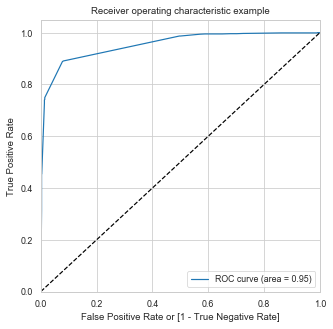

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00253646,
        0.00253646, 0.00253646, 0.00253646, 0.00317058, 0.01268231,
        0.01268231, 0.01395054, 0.01395054, 0.01395054, 0.01395054,
        0.07736208, 0.07926443, 0.08053266, 0.49651237, 0.4977806 ,
        0.49841471, 0.50031706, 0.57006975, 0.5884591 , 0.64870006,
        0.64933418, 0.67977172, 0.6873811 , 0.70196576, 0.72606214,
        0.72986684, 0.73050095, 0.86239696, 0.86366519, 0.87000634,
        0.8890298 , 0.88966392, 0.90171211, 0.90298034, 0.90488269,
        0.9055168 , 0.917565  , 0.92517438, 0.97400127, 0.97463538,
        0.97844008, 0.97907419, 0.97970831, 0.98034242, 0.983513  ,
        0.98478123, 0.98668358, 0.98985415, 0.99112238, 0.99429296,
        0.99556119, 0.99682942, 0.99746354, 0.99936588, 1.        ]),
 array([0.        , 0.00200803, 0.0060241 , 0.00803213, 0.00903614,
        0.01305221, 0.01506024, 0.02610442, 0.

In [1227]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

### Calculating the Area Under the Curve(GINI)

In [1228]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.0
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [1229]:
auc = auc_val(fpr,tpr)
auc

0.9541851616994298

**Since Area under Curve is approx 95% ,the model is best fit model**

### Step 11 Lead Score Calcualtion

### Lead Score = 100 * ConversionProbability
####  calculated for all the leads from the original dataset 

In [1230]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,6190,0,0.00,0
1,7073,0,0.13,0
2,4519,0,0.13,0
3,607,1,1.00,1
4,440,0,0.13,0


In [1231]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.07,8529,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.01,7331,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.56,7688,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.13,92,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.13,4908,0,1,1,0,0,0,0,0,0,0,0,0


In [1232]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['LeadID','Converted','Conversion_Prob','final_predicted']]
leads_train_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,8529,0,0.07,0
1,7331,0,0.01,0
2,7688,1,0.56,1
3,92,0,0.13,0
4,4908,0,0.13,0


### Concatenating the train and the test dataset with the Conversion Probabilities

In [1233]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,8529,0,0.07,0
1,7331,0,0.01,0
2,7688,1,0.56,1
3,92,0,0.13,0
4,4908,0,0.13,0


In [1234]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6002, 4)
(2573, 4)
(8575, 4)


In [1235]:
# Ensuring the LeadIDs are unique for each lead in the finl dataframe
len(lead_full_pred['LeadID'].unique().tolist())

8575

In [1236]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted,Lead_Score
0,8529,0,0.07,0,7
1,7331,0,0.01,0,1
2,7688,1,0.56,1,56
3,92,0,0.13,0,13
4,4908,0,0.13,0,13


In [1237]:
# Inspecing the max LeadID
lead_full_pred.LeadID.max()

9239

In [1238]:
# Making the LeadID column as index
# We willlater join it with the original_leads dataframe based on index
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
LeadID,,,,
0,0,0.03,0,3
1,0,0.01,0,1
2,1,0.95,1,95
3,0,0.01,0,1
4,1,0.95,1,95


In [1239]:
# Slicing the Lead Number column from original_leads dataframe
original_leads = original_leads[['Lead Number']]
original_leads.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


In [1240]:
# Concatenating the 2 dataframes based on index and displaying the top 10 rows
# This is done son that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.
leads_with_score = pd.concat([original_leads, lead_full_pred], axis=1)
leads_with_score.head(10)

,Lead Number,Converted,Conversion_Prob,final_predicted,Lead_Score
LeadID,,,,,
0,660737,0,0.03,0,3
1,660728,0,0.01,0,1
2,660727,1,0.95,1,95
3,660719,0,0.01,0,1
4,660681,1,0.95,1,95
5,660680,0,0.13,0,13
6,660673,1,0.95,1,95
7,660664,0,0.13,0,13
8,660624,0,0.13,0,13


In [1241]:
# Inspecting the dataframe shape
leads_with_score.shape

(8575, 5)

In [1242]:
# Inspectin if the final dataframe has any null values

total = pd.DataFrame(leads_with_score.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_with_score.isnull().sum()/leads_with_score.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead_Score,0,0.00
final_predicted,0,0.00
Conversion_Prob,0,0.00
Converted,0,0.00
Lead Number,0,0.00


### Step 12: Determining Feature Importance

In [1243]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Lead Source_Welingak Website                 4.67
Lead Quality_Worst                          -2.41
Asymmetrique Activity Index_03.Low          -1.95
Tags_Already a student                      -2.48
Tags_Closed by Horizzon                      6.49
Tags_Interested in other courses            -1.64
Tags_Lost to EINS                            6.51
Tags_Not doing further education            -2.36
Tags_Ringing                                -2.86
Tags_Will revert after reading the email     4.77
Tags_invalid number                        -23.30
Tags_number not provided                   -23.58
Tags_switched off                           -3.76
Tags_wrong number given                    -23.71
Last Activity_SMS Sent                       2.14
dtype: float64

In [1244]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Lead Source_Welingak Website                 71.75
Lead Quality_Worst                          -37.02
Asymmetrique Activity Index_03.Low          -29.99
Tags_Already a student                      -38.09
Tags_Closed by Horizzon                      99.66
Tags_Interested in other courses            -25.14
Tags_Lost to EINS                           100.00
Tags_Not doing further education            -36.30
Tags_Ringing                                -43.93
Tags_Will revert after reading the email     73.22
Tags_invalid number                        -357.76
Tags_number not provided                   -362.10
Tags_switched off                           -57.81
Tags_wrong number given                    -364.11
Last Activity_SMS Sent                       32.88
dtype: float64

In [1245]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Lead Source_Welingak Website                13
Lead Quality_Worst                          11
Asymmetrique Activity Index_03.Low          10
Tags_Already a student                      12
Tags_Closed by Horizzon                      8
Tags_Interested in other courses             3
Tags_Lost to EINS                            1
Tags_Not doing further education             7
Tags_Ringing                                 2
Tags_Will revert after reading the email     5
Tags_invalid number                         14
Tags_number not provided                     0
Tags_switched off                            9
Tags_wrong number given                      4
Last Activity_SMS Sent                       6
dtype: int64

#### Plot showing the feature variables based on their relative coefficient values

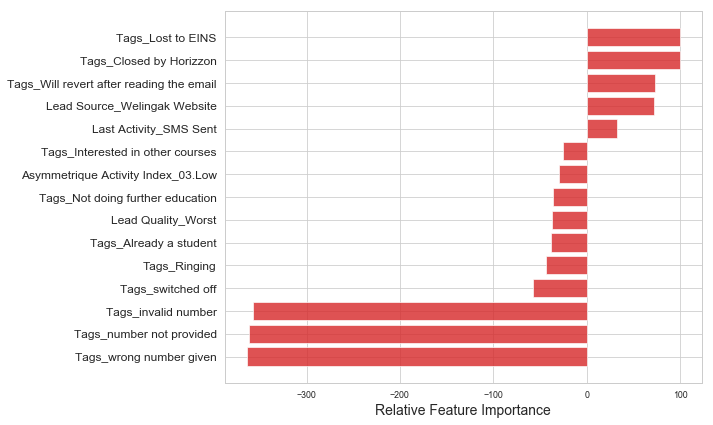

In [1246]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

##### **Selecting Top 4 features which contribute most towards the probability of a lead getting converted**

In [1247]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(4)

,index,0
6,Tags_Lost to EINS,100.00
4,Tags_Closed by Horizzon,99.66
9,Tags_Will revert after reading the email,73.22
0,Lead Source_Welingak Website,71.75


## Step 13: Conclusion and Results

The Top 4  feature hot leads which likely be converted are 
1. Tags_Lost to EINS
2. Tags_Closed by Horizzon
3. Tags_Will revert after reading the email
4. Lead Source_Welingak Website